# SHAP

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [18]:
file_path = 'breastw.csv'
# file_path = 'D:/2-individual project/dataset/mammography.csv'
glass_data = pd.read_csv(file_path)

In [19]:

scaler = StandardScaler()
glass_scaled = scaler.fit_transform(glass_data)


iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(glass_scaled)
anomaly_scores = iso_forest.decision_function(glass_scaled)
anomaly_pred = iso_forest.predict(glass_scaled)

In [20]:

glass_data['Anomaly_Score'] = anomaly_scores
glass_data['Anomaly_Pred'] = anomaly_pred

In [21]:

explainer = shap.TreeExplainer(iso_forest)
shap_values = explainer.shap_values(glass_scaled)

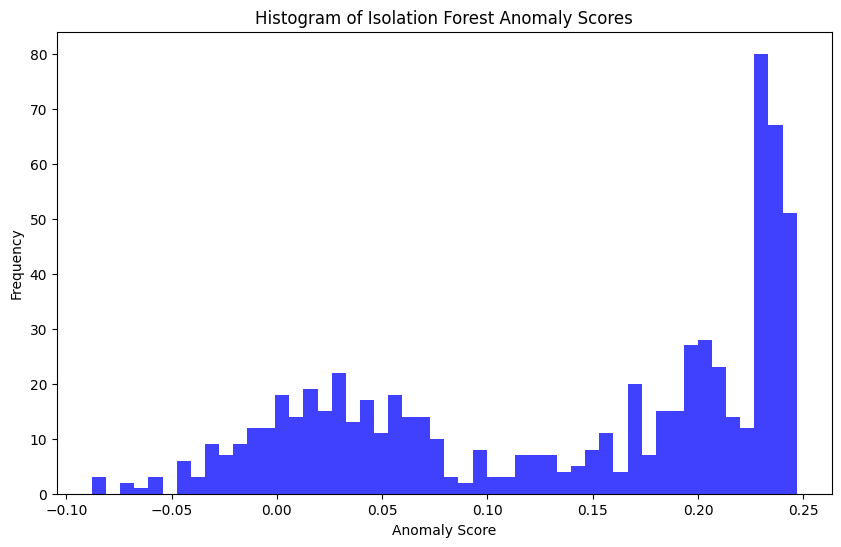

In [22]:

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

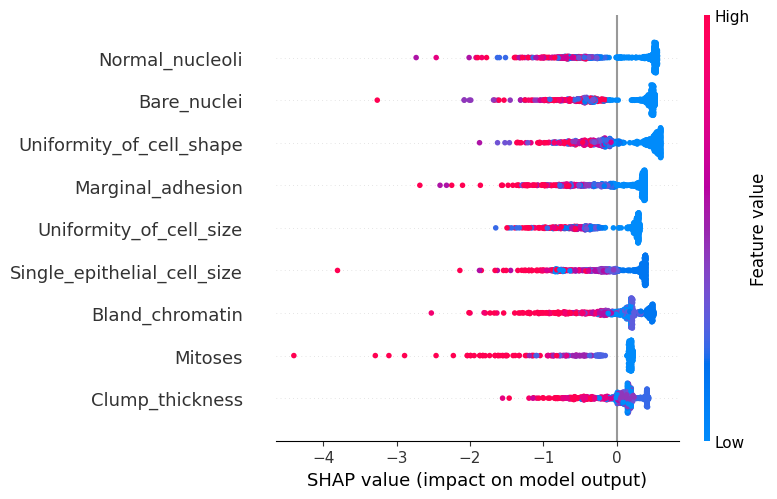

In [23]:
shap.summary_plot(shap_values, glass_scaled, feature_names=glass_data.columns[:-2])
